# Chapter 1_4 0-1回归
----
Author: W.Y.  
Date: 2020/1/15  
Update: 2020/2/5  
Info: 王汉生老师书的第四章，0-1回归的python极简实现  

----

In [12]:
# 导入模块

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib
import seaborn as sns
import statsmodels.formula.api as smf  
import stepwiseSelection
from sklearn import metrics  # 用于计算fpr和tpr

In [2]:
# 导入数据

data = pd.read_csv('E:/Data Mining/SimplePython/Chapter 1 从R到Python/CH 1_4 0-1回归/CH 1_4 data ST.csv')

In [3]:
# 数据分割

data1999 = data[data['year'] == 1999]
data2000 = data[data['year'] == 2000]

In [4]:
# 预览数据

data.head()

,year,ARA,ASSET,ATO,GROWTH,LEV,ROA,SHARE,ST
0,1999,0.192310,19.856048,0.0052,-0.950727,0.445880,0.087710,26.89,0
1,1999,0.220120,20.910863,0.0056,-0.942656,0.398686,0.016820,39.62,0
2,1999,0.325292,19.352623,0.0166,-0.937440,0.303348,0.042468,26.46,0
3,1999,0.025729,21.438928,0.0028,-0.852995,0.758250,0.018152,60.16,0
4,1999,0.533591,21.613339,0.2552,-0.816704,0.726875,0.004147,54.24,1


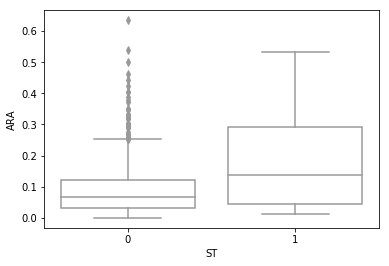

In [5]:
# 箱图

sns.boxplot(data1999['ST'], data1999['ARA'],color='white')

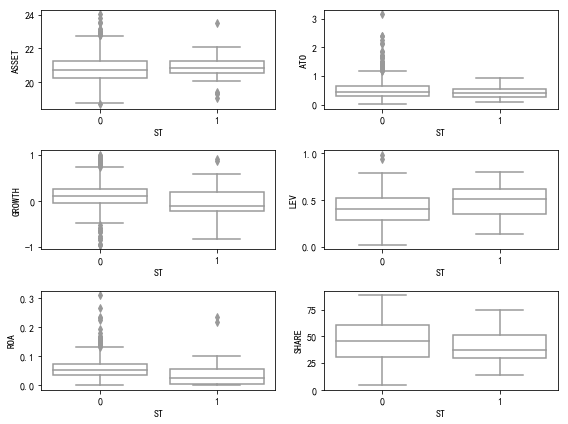

In [6]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 正常显示中文
plt.rcParams['axes.unicode_minus']=False  # 正常显示负号

fig = plt.figure(figsize=(8, 6))
sns.boxplot(data1999['ST'], data1999['ASSET'], color='white', ax=plt.subplot(3,2,1)) 
sns.boxplot(data1999['ST'], data1999['ATO'], color='white', ax=plt.subplot(3,2,2))
sns.boxplot(data1999['ST'], data1999['GROWTH'], color='white', ax=plt.subplot(3,2,3))
sns.boxplot(data1999['ST'], data1999['LEV'], color='white',ax=plt.subplot(3,2,4))
sns.boxplot(data1999['ST'], data1999['ROA'], color='white',ax=plt.subplot(3,2,5))
sns.boxplot(data1999['ST'], data1999['SHARE'], color='white',ax=plt.subplot(3,2,6))
fig.tight_layout()

In [7]:
# Logit回归（全模型）

logit1 = smf.logit('ST ~ ARA + ASSET + ATO + GROWTH + '
                   'LEV + ROA + SHARE', data1999).fit()

print(logit1.summary())

Optimization terminated successfully.
         Current function value: 0.183849
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                     ST   No. Observations:                  684
Model:                          Logit   Df Residuals:                      676
Method:                           MLE   Df Model:                            7
Date:                Tue, 04 Feb 2020   Pseudo R-squ.:                  0.1084
Time:                        19:38:29   Log-Likelihood:                -125.75
converged:                       True   LL-Null:                       -141.04
                                        LLR p-value:                 7.477e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.8692      4.636     -1.913      0.056     -17.955       0.217
ARA            4.8797      1.

In [8]:
# Probit回归（全模型）

probit1 = smf.probit('ST ~ ARA + ASSET + ATO + GROWTH + '
                   'LEV + ROA + SHARE', data1999).fit()

print(probit1.summary())

Optimization terminated successfully.
         Current function value: 0.183018
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                     ST   No. Observations:                  684
Model:                         Probit   Df Residuals:                      676
Method:                           MLE   Df Model:                            7
Date:                Tue, 04 Feb 2020   Pseudo R-squ.:                  0.1124
Time:                        19:39:07   Log-Likelihood:                -125.18
converged:                       True   LL-Null:                       -141.04
                                        LLR p-value:                 4.612e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9545      2.210     -2.242      0.025      -9.286      -0.623
ARA            2.6467      0.

In [11]:
# 变量选择

X_train = data1999.iloc[:, 1:8]

In [18]:
# AIC 

logit_aic_vars, logit_aic_logs = stepwiseSelection.backwardSelection(X_train, data1999['ST'], model_type='logistic')

Character Variables (Dummies Generated, First Dummies Dropped): []
Optimization terminated successfully.
         Current function value: 0.183849
         Iterations 8
Eliminated : ROA
Optimization terminated successfully.
         Current function value: 0.183857
         Iterations 8
Eliminated : ATO
Optimization terminated successfully.
         Current function value: 0.184357
         Iterations 8
Eliminated : SHARE
Optimization terminated successfully.
         Current function value: 0.185201
         Iterations 8
Eliminated : ASSET
Optimization terminated successfully.
         Current function value: 0.185699
         Iterations 8
Eliminated : GROWTH
Optimization terminated successfully.
         Current function value: 0.187743
         Iterations 8
Regained :  GROWTH
                           Logit Regression Results                           
Dep. Variable:                     ST   No. Observations:                  684
Model:                          Logit   Df Residuals

In [19]:
logit_aic = smf.logit('ST ~ ARA + GROWTH + LEV', data1999).fit()
print(logit_aic.summary())

Optimization terminated successfully.
         Current function value: 0.185699
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                     ST   No. Observations:                  684
Model:                          Logit   Df Residuals:                      680
Method:                           MLE   Df Model:                            3
Date:                Tue, 04 Feb 2020   Pseudo R-squ.:                 0.09939
Time:                        19:50:58   Log-Likelihood:                -127.02
converged:                       True   LL-Null:                       -141.04
                                        LLR p-value:                 3.572e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6022      0.565     -8.152      0.000      -5.709      -3.496
ARA            5.1301      1.

In [20]:
# BIC

logit_bic_vars, logit_bic_logs = stepwiseSelection.backwardSelection(X_train, data1999['ST'], model_type='logistic', elimination_criteria='bic')

Character Variables (Dummies Generated, First Dummies Dropped): []
Optimization terminated successfully.
         Current function value: 0.183849
         Iterations 8
Eliminated : ROA
Optimization terminated successfully.
         Current function value: 0.183857
         Iterations 8
Eliminated : ATO
Optimization terminated successfully.
         Current function value: 0.184357
         Iterations 8
Eliminated : SHARE
Optimization terminated successfully.
         Current function value: 0.185201
         Iterations 8
Eliminated : ASSET
Optimization terminated successfully.
         Current function value: 0.185699
         Iterations 8
Eliminated : GROWTH
Optimization terminated successfully.
         Current function value: 0.187743
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                     ST   No. Observations:                  684
Model:                          Logit   Df Residuals:                  

In [23]:
logit_bic = smf.logit('ST ~ ARA', data1999).fit()
print(logit_bic.summary())

# 类似前几章，结果和R不一样，还是用了和书上一样的

Optimization terminated successfully.
         Current function value: 0.191312
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                     ST   No. Observations:                  684
Model:                          Logit   Df Residuals:                      682
Method:                           MLE   Df Model:                            1
Date:                Tue, 04 Feb 2020   Pseudo R-squ.:                 0.07217
Time:                        19:51:42   Log-Likelihood:                -130.86
converged:                       True   LL-Null:                       -141.04
                                        LLR p-value:                 6.429e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6834      0.272    -13.531      0.000      -4.217      -3.150
ARA            6.3316      1.

In [24]:
# 预测
# Logit全模型

predict_logit1 = logit1.predict(exog = data2000)

In [25]:
# 以0.50为阈值，查看预测结果

matrix_logit_1 = metrics.confusion_matrix(data2000['ST'], np.where(predict_logit1 > 0.5, 1, 0), labels=[0,1])
print(pd.DataFrame(matrix_logit_1))

     0  1
0  699  0
1   47  0


In [26]:
# 以0为阈值，查看预测结果

matrix_logit_2 = metrics.confusion_matrix(data2000['ST'], np.where(predict_logit1 > 0, 1, 0), labels=[0,1])
print(pd.DataFrame(matrix_logit_2))

   0    1
0  0  699
1  0   47


In [27]:
# 以0.05为阈值，查看预测结果

matrix_logit_3 = metrics.confusion_matrix(data2000['ST'], np.where(predict_logit1 > 0.05, 1, 0), labels=[0,1])
print(pd.DataFrame(matrix_logit_3))


     0    1
0  504  195
1   18   29


In [ ]:
# 多个模型的ROC曲线，直接一起画了
# 四个模型：logit全模型，logit的AIC，logit的BIC，probit的全模型

# 计算预测值

predict_logit1 = logit1.predict(exog = data2000)
predict_logit_aic = logit_aic.predict(exog = data2000)
predict_logit_bic = logit_bic.predict(exog = data2000)
predict_probit1 = probit1.predict(exog = data2000)


In [45]:
# 计算fpr和tpr值

fpr_logit1, tpr_logit1, threshold_logit1 = metrics.roc_curve(data2000['ST'], predict_logit1, drop_intermediate=False)
fpr_logit_aic, tpr_logit_aic, threshold_logit_aic = metrics.roc_curve(data2000['ST'], predict_logit_aic, drop_intermediate=False)
fpr_logit_bic, tpr_logit_bic, threshold_logit_bic = metrics.roc_curve(data2000['ST'], predict_logit_bic, drop_intermediate=False)
fpr_probit1, tpr_probit1, threshold_probit1 = metrics.roc_curve(data2000['ST'], predict_probit1, drop_intermediate=False)

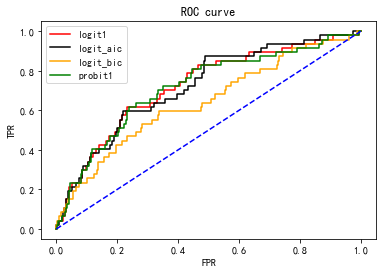

In [48]:
# 绘制ROC曲线

plt.figure()
plt.plot(fpr_logit1, tpr_logit1, color='red', label='logit1')
plt.plot(fpr_logit_aic, tpr_logit_aic, color='black', label='logit_aic')
plt.plot(fpr_logit_bic, tpr_logit_bic, color='orange', label='logit_bic')
plt.plot(fpr_probit1, tpr_probit1, color='green', label='probit1')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()  # 显示图例
plt.show()
